In [1]:
import numpy as np
import matplotlib.pyplot as plt


def x(n):
    if n >= 0 and n < 6:
        x_dict = {0:1,1:2,2:3,3:4,4:2,5:1}
        return x_dict[n]
    else:
        return 0

def h(n):
    if n < 0:
        return 0

    elif n == 0:
        return 1    #h(0) = 1
        
    elif n == 1:
        return -0.5 #h(1) = -1/2
    else:
        return 5.0 * ((-0.5)**n)

n = 16
xn_i = [x(i) for i in range(n)]
hn_i = [h(i) for i in range(n)]


########################################################    FFT    ########################################################


def fft(x):

    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X




################################    PLOTS   #################################################

############################    X(k)    ###########################

Xo = fft(xn_i)
X = np.real(Xo)

'''plt.stem(range(0,n),X)
plt.title('X(k) using FFT')
plt.xlabel('$k$')
plt.ylabel('$X(k)$')
plt.grid(True, which='both')
plt.savefig('Assignment 1/filter/figs/e6.4-Xk-FFT.jpg')
plt.show()    
'''

###########################     H(k)    ###########################

Ho = fft(hn_i)
H = np.real(Ho)/n
#print("\nRe{H}\n")
#print(H)
'''
plt.stem(range(0,n),H)
plt.title('H(k) using FFT')
plt.xlabel('$k$')
plt.ylabel('$H(k)$')
plt.grid(True, which='both')
plt.savefig('Assignment 1/filter/figs/e6.4-Hk-FFT.jpg')
plt.show()    
'''

###########################     Y(k)    ###########################
Yo = []
for k in range(n):
    Yo.append(Xo[k] * Ho[k])
#print("\nRe{Y}\n")
#print(Y)
Y = np.real(Yo)

'''
plt.stem(range(0,n),Y)
plt.title('Y(k) from FFT')
plt.xlabel('$k$')
plt.ylabel('$Y(k) = H(k)X(k)$')
plt.grid(True, which='both')
plt.savefig('Assignment 1/filter/figs/e6.4-Yk-FFT.jpg')
plt.show() 


plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.stem(range(0,n),X)
plt.ylabel('$X(k)$')
plt.grid()
plt.title('X(k) using FFT')
plt.subplot(3,1,2)
plt.stem(range(0,n),H)
plt.ylabel('$H(k)$')
plt.grid()
plt.title('H(k) using FFT')
plt.subplot(3,1,3)
plt.stem(range(0,n),Y)
plt.xlabel('$k$')
plt.ylabel('$Y(k)$')
plt.title('Y(k) using FFT')
plt.grid()
plt.savefig('Assignment 1/filter/figs/e6.4-FFT.jpg')
plt.show()
'''





########################################################    IFFT    ########################################################

def ifft(X):
    '''
    N = len(X)
    
    if N == 1:
        return X
    else:
        x_even = fft(X[::2])
        x_odd = fft(X[1::2])
        factor = np.exp(2j*np.pi*np.arange(N)/ N)
        
        x = np.concatenate([x_even+factor[:int(N/2)]*x_odd,
             x_even+factor[int(N/2):]*x_odd])
        return x
    '''
    Xx = np.conjugate(X)
    x = fft(Xx)
    return x

yn = ifft(Yo)
yf = np.real(yn)

print('Re{y}')
print(yf)

Re{y}
[ 1.59707031e+01  2.40122070e+01  5.19902344e+01  7.00000000e+01
  4.49975586e+01  5.75000000e+01  3.25000000e+00  1.43750000e+01
 -7.18750000e+00  3.59375000e+00 -1.79687500e+00  8.98437500e-01
 -4.49218750e-01  2.24609375e-01 -1.12304687e-01  5.61523438e-02]


In [2]:
N = 16
n = np.arange(N)
fn=(-1/2)**n
hn1=np.pad(fn, (0,2), 'constant', constant_values=(0))
hn2=np.pad(fn, (2,0), 'constant', constant_values=(0))
h = hn1+hn2

xtemp=np.array([1.0,2.0,3.0,4.0,2.0,1.0])
x=np.pad(xtemp, (0,N-6), 'constant', constant_values=(0))

X = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		X[k]+=x[n]*np.exp(-1j*2*np.pi*n*k/N)
H = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		H[k]+=h[n]*np.exp(-1j*2*np.pi*n*k/N)

Y = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	Y[k] = X[k]*H[k]

y = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		y[k]+=Y[n]*np.exp(1j*2*np.pi*n*k/N)
yd = np.real(y)

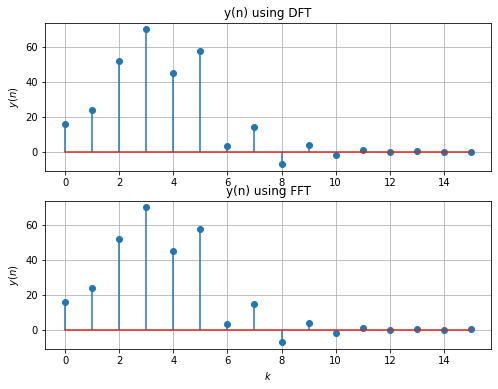

In [21]:
yd = np.real(yd)
y = np.real(y)
fig = plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.stem(range(0,N),yd)
plt.ylabel('$y(n)$')
plt.grid()
plt.title('y(n) using DFT')

plt.subplot(2,1,2)
plt.stem(range(0,N),yf)
plt.xlabel('$k$')
plt.ylabel('$y(n)$')
plt.title('y(n) using FFT')
plt.grid()
plt.savefig('filter/figs/e6.4DFT-FFT.jpg',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()